<a href="https://colab.research.google.com/github/juharrais/FIESC/blob/main/Questao2(b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Montar o Google Drive no Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Instalação do OpenCV
!pip install opencv-python
!pip install tifffile

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread

In [ ]:
# Carregue as 4 imagens com 8 canais espectrais cada uma (substitua pelos seus caminhos de arquivo)
image1 = imread('/content/drive/MyDrive/FIESC_Prova/Questão2/8band_AOI_1_RIO_img46.tif')
image2 = imread('/content/drive/MyDrive/FIESC_Prova/Questão2/8band_AOI_1_RIO_img47.tif')
image3 = imread('/content/drive/MyDrive/FIESC_Prova/Questão2/8band_AOI_1_RIO_img66.tif')
image4 = imread('/content/drive/MyDrive/FIESC_Prova/Questão2/8band_AOI_1_RIO_img67.tif')

In [ ]:
# Carregue cada canal em uma matriz numpy
channel1 = imread('/content/drive/MyDrive/FIESC_Prova/Questão2/8band_AOI_1_RIO_img46.tif')
channel2 = imread('/content/drive/MyDrive/FIESC_Prova/Questão2/8band_AOI_1_RIO_img47.tif')
channel3 = imread('/content/drive/MyDrive/FIESC_Prova/Questão2/8band_AOI_1_RIO_img66.tif')
channel4 = imread('/content/drive/MyDrive/FIESC_Prova/Questão2/8band_AOI_1_RIO_img67.tif')

In [ ]:
# Empilhe os canais em uma única matriz (8 canais)
spectral_image = np.stack((channel1, channel2, channel3, channel4), axis=-1)

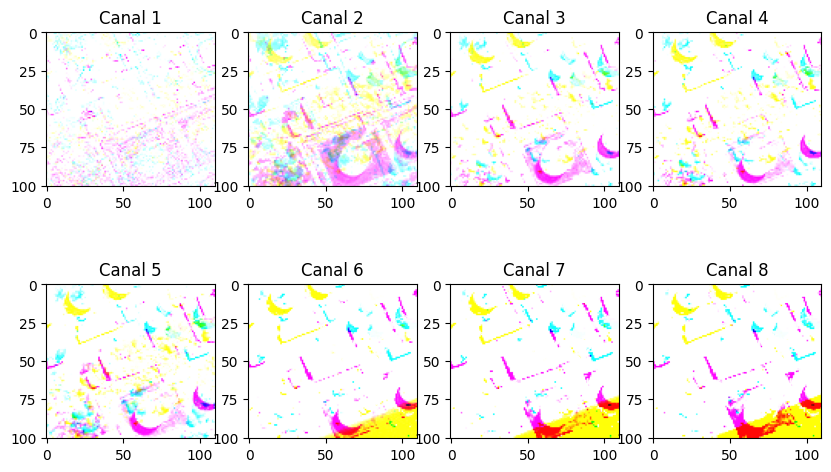

In [ ]:
#Exibindo cada canal separadamente:
plt.figure(figsize=(10, 6))

for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(spectral_image[:, :, i], cmap='gray')
    plt.title(f'Canal {i+1}')

plt.show()


In [ ]:
# Canais espectrais da imagem 1 para criar a imagem de cor falsa para cada imagem
# Suponha que você deseja usar os canais 4, 3 e 2 para criar a imagem RGB falsa
channel_red = [image1[:, :, 3], image2[:, :, 3], image3[:, :, 3], image4[:, :, 3]]
channel_green = [image1[:, :, 2], image2[:, :, 2], image3[:, :, 2], image4[:, :, 2]]
channel_blue = [image1[:, :, 1], image2[:, :, 1], image3[:, :, 1], image4[:, :, 1]]

In [ ]:
# Combinar os canais selecionados para criar a imagem de cor falsa para cada imagem
rgb_images = [np.stack((red, green, blue), axis=-1) for red, green, blue in zip(channel_red, channel_green, channel_blue)]

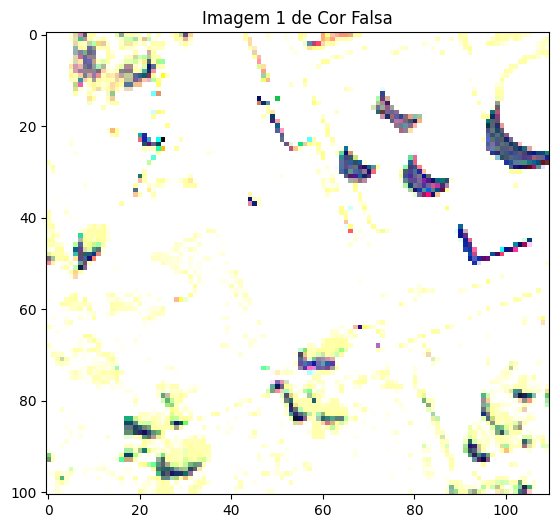

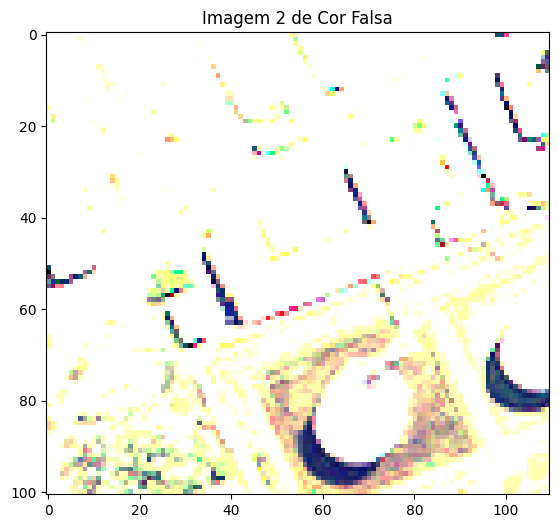

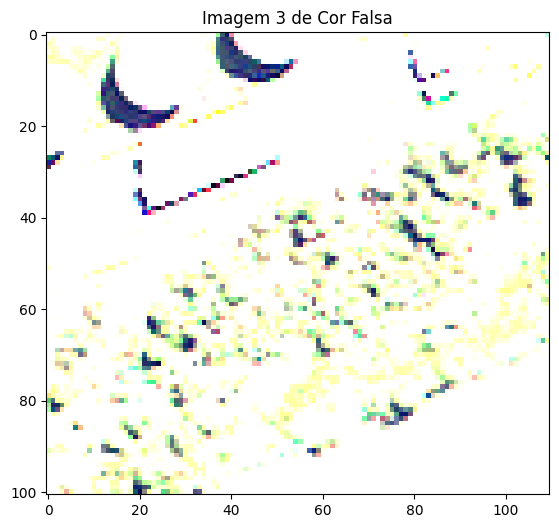

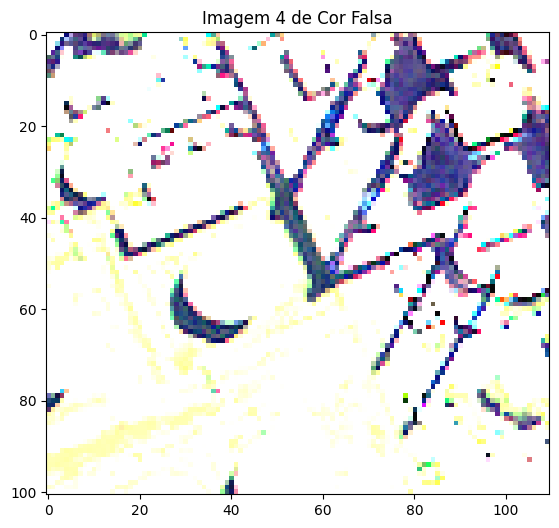

In [ ]:
# Exiba as imagens de cor falsa individualmente
for i, rgb_image in enumerate(rgb_images):
    plt.figure(figsize=(8, 6))
    plt.imshow(rgb_image)
    plt.title(f'Imagem {i+1} de Cor Falsa')
    plt.show()

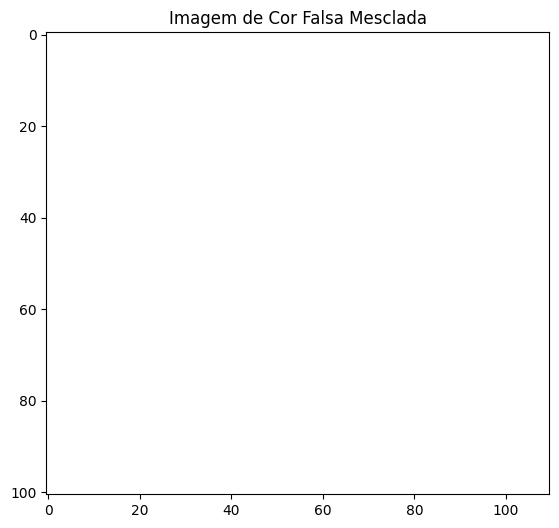

In [ ]:
# Se desejar, você pode mesclar as 4 imagens de cor falsa em uma única imagem
merged_image = np.mean(np.array(rgb_images), axis=0)
plt.figure(figsize=(8, 6))
plt.imshow(merged_image)
plt.title('Imagem de Cor Falsa Mesclada')
plt.show()

In [ ]:
#Calcular o NDVI, o EVI e o NDWI para uma imagem.
import cv2
from tifffile import imread, imwrite

IMAGEM 46

In [ ]:
# Calcular o NDVI (Índice de Vegetação por Diferença Normalizada)
ndvi_image1 = (image1[:, :, 3] - image1[:, :, 2]) / (image1[:, :, 3] + image1[:, :, 2])

# Calcular o EVI (Índice de Vegetação Melhorado)
evi_image1 = 2.5 * ((image1[:, :, 3] - image1[:, :, 2]) / (image1[:, :, 3] + 6 * image1[:, :, 2] - 7.5 * image1[:, :, 0] + 1))

# Calcular o NDWI (Índice de Água por Diferença Normalizada)
ndwi_image1 = (image1[:, :, 2] - image1[:, :, 3]) / (image1[:, :, 2] + image1[:, :, 3])


<ipython-input-74-8e33e09e627c>:5: RuntimeWarning: divide by zero encountered in divide
  evi_image1 = 2.5 * ((image1[:, :, 3] - image1[:, :, 2]) / (image1[:, :, 3] + 6 * image1[:, :, 2] - 7.5 * image1[:, :, 0] + 1))


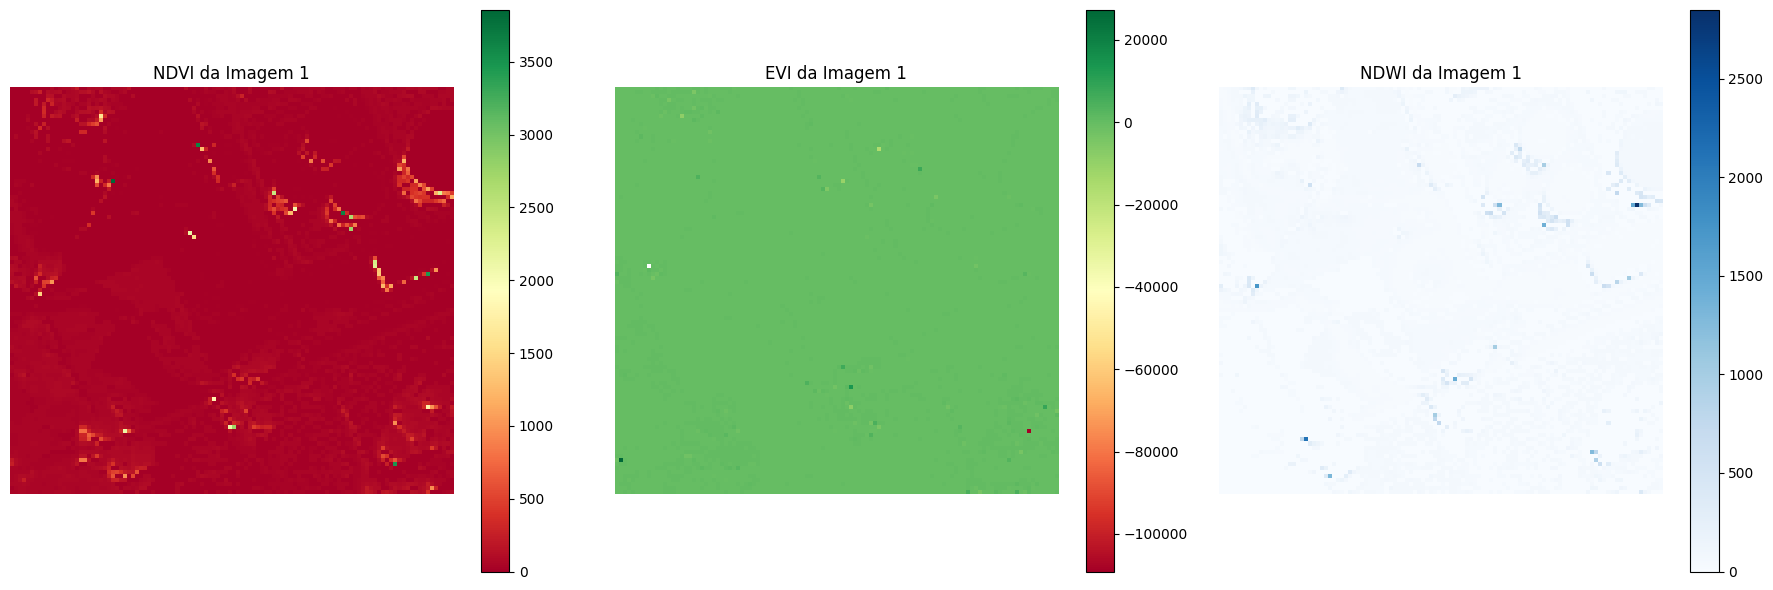

In [ ]:
# Crie uma figura com três subplots na mesma linha
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: NDVI
axs[0].imshow(ndvi_image1, cmap='RdYlGn')
axs[0].set_title('NDVI da Imagem 1')
axs[0].axis('off')
fig.colorbar(axs[0].imshow(ndvi_image1, cmap='RdYlGn'), ax=axs[0])

# Plot 2: EVI
axs[1].imshow(evi_image1, cmap='RdYlGn')
axs[1].set_title('EVI da Imagem 1')
axs[1].axis('off')
fig.colorbar(axs[1].imshow(evi_image1, cmap='RdYlGn'), ax=axs[1])

# Plot 3: NDWI
axs[2].imshow(ndwi_image1, cmap='Blues')
axs[2].set_title('NDWI da Imagem 1')
axs[2].axis('off')
fig.colorbar(axs[2].imshow(ndwi_image1, cmap='Blues'), ax=axs[2])

plt.tight_layout()
plt.show()


Para realizar a segmentação por NDVI, você precisa aplicar um limiar nos valores do NDVI calculados para separar as áreas de vegetação das áreas não vegetadas. O NDVI varia de -1 a 1, com valores mais altos indicando áreas mais verdes (vegetação saudável) e valores mais baixos indicando áreas menos verdes ou não vegetadas. O limiar que você escolhe dependerá da sua aplicação específica e dos resultados desejados.

Aqui estão os passos para realizar a segmentação por NDVI no Google Colab:

Escolher um Limiar NDVI:

Determine o valor de limiar que você deseja usar para distinguir entre vegetação e não vegetação. Isso pode ser feito com base na análise do histograma do NDVI ou com conhecimento prévio do seu cenário.
Aplicar o Limiar NDVI:

Crie uma imagem binária onde os pixels com valores de NDVI maiores que o limiar são definidos como 1 (vegetação) e os pixels com valores menores ou iguais ao limiar são definidos como 0 (não vegetação).

In [ ]:
# Suponha que você tenha um NDVI calculado (ndvi_imagem1) e um valor de limiar escolhido (por exemplo, 0.2)
limiar_ndvi = 0.4

# Aplicar o limiar NDVI
mascara_vegetacao = ndvi_image1 > limiar_ndvi


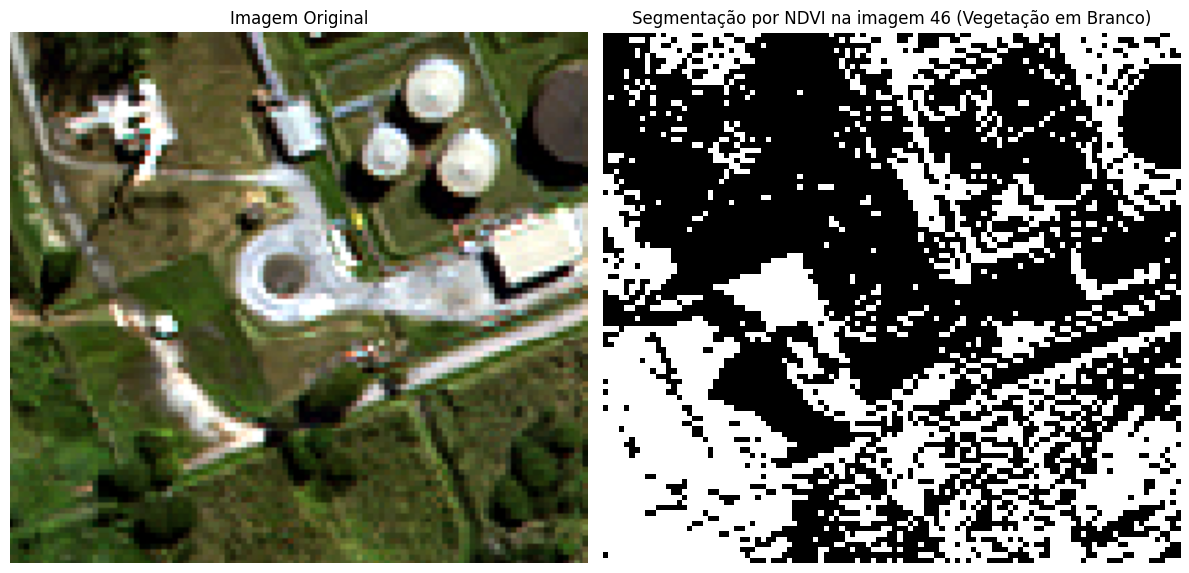

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Caminho para a imagem original no Google Drive
caminho_imagem_original = '/content/drive/MyDrive/FIESC_Prova/Questão2/img46.png'


# Carregue as imagens
imagem_original = mpimg.imread(caminho_imagem_original)

# Crie uma figura com dois subplots (um ao lado do outro)
plt.figure(figsize=(12, 6))

# Subplot 1: Imagem Original
plt.subplot(1, 2, 1)
plt.imshow(imagem_original)
plt.title('Imagem Original')
plt.axis('off')  # Desativa os eixos

# Subplot 2: Máscara de Segmentação por NDVI
plt.subplot(1, 2, 2)
plt.imshow(mascara_vegetacao, cmap='gray')
plt.title('Segmentação por NDVI na imagem 46 (Vegetação em Branco)')
plt.axis('off')  # Desativa os eixos

plt.tight_layout()  # Melhora o espaçamento entre os subplots
plt.show()


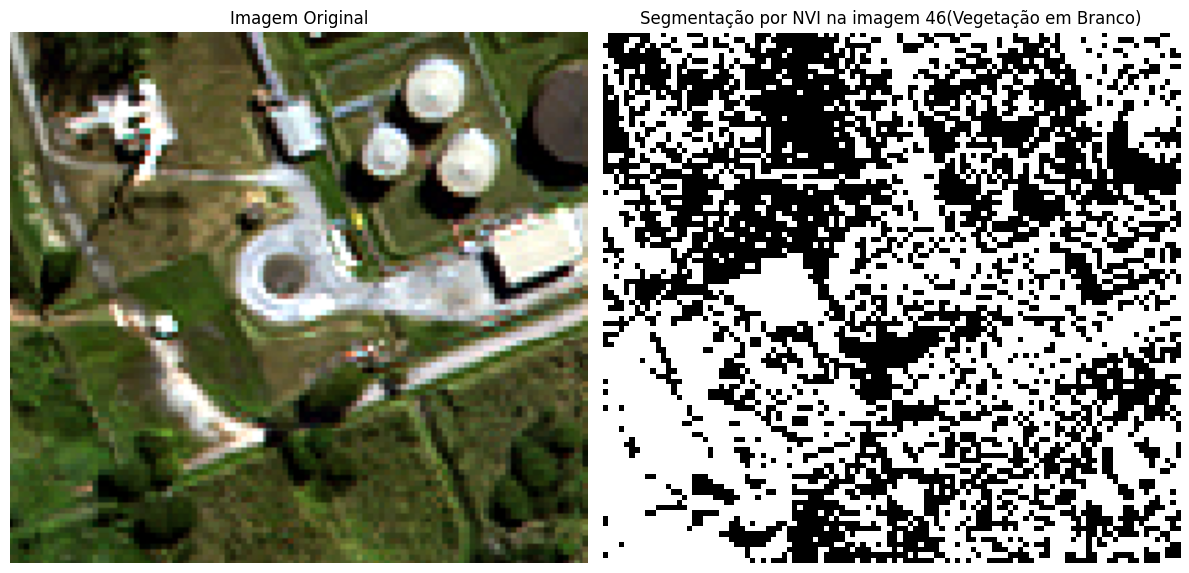

In [ ]:
# Suponha que você tenha um NDVI calculado (ndvi_imagem1) e um valor de limiar escolhido (por exemplo, 0.2)
limiar_nvi = 0.2

# Aplicar o limiar NVI
mascara_vegetacao = evi_image1 > limiar_nvi


# Caminho para a imagem original no Google Drive
caminho_imagem_original = '/content/drive/MyDrive/FIESC_Prova/Questão2/img46.png'


# Carregue as imagens
imagem_original = mpimg.imread(caminho_imagem_original)

# Crie uma figura com dois subplots (um ao lado do outro)
plt.figure(figsize=(12, 6))

# Subplot 1: Imagem Original
plt.subplot(1, 2, 1)
plt.imshow(imagem_original)
plt.title('Imagem Original')
plt.axis('off')  # Desativa os eixos

# Subplot 2: Máscara de Segmentação por NVI
plt.subplot(1, 2, 2)
plt.imshow(mascara_vegetacao, cmap='gray')
plt.title('Segmentação por NVI na imagem 46(Vegetação em Branco)')
plt.axis('off')  # Desativa os eixos

plt.tight_layout()  # Melhora o espaçamento entre os subplots
plt.show()


In [ ]:
#IMAGEM 2

In [ ]:
# Calcular o NDVI (Índice de Vegetação por Diferença Normalizada)
ndvi_image2 = (image2[:, :, 3] - image2[:, :, 2]) / (image2[:, :, 3] + image2[:, :, 2])

# Calcular o EVI (Índice de Vegetação Melhorado)
evi_image2 = 2.5 * ((image2[:, :, 3] - image2[:, :, 2]) / (image2[:, :, 3] + 6 * image2[:, :, 2] - 7.5 * image2[:, :, 0] + 1))

# Calcular o NDWI (Índice de Água por Diferença Normalizada)
ndwi_image2 = (image2[:, :, 2] - image2[:, :, 3]) / (image2[:, :, 2] + image2[:, :, 3])


<ipython-input-89-de8a9a7d17d9>:5: RuntimeWarning: divide by zero encountered in divide
  evi_image2 = 2.5 * ((image2[:, :, 3] - image2[:, :, 2]) / (image2[:, :, 3] + 6 * image2[:, :, 2] - 7.5 * image2[:, :, 0] + 1))


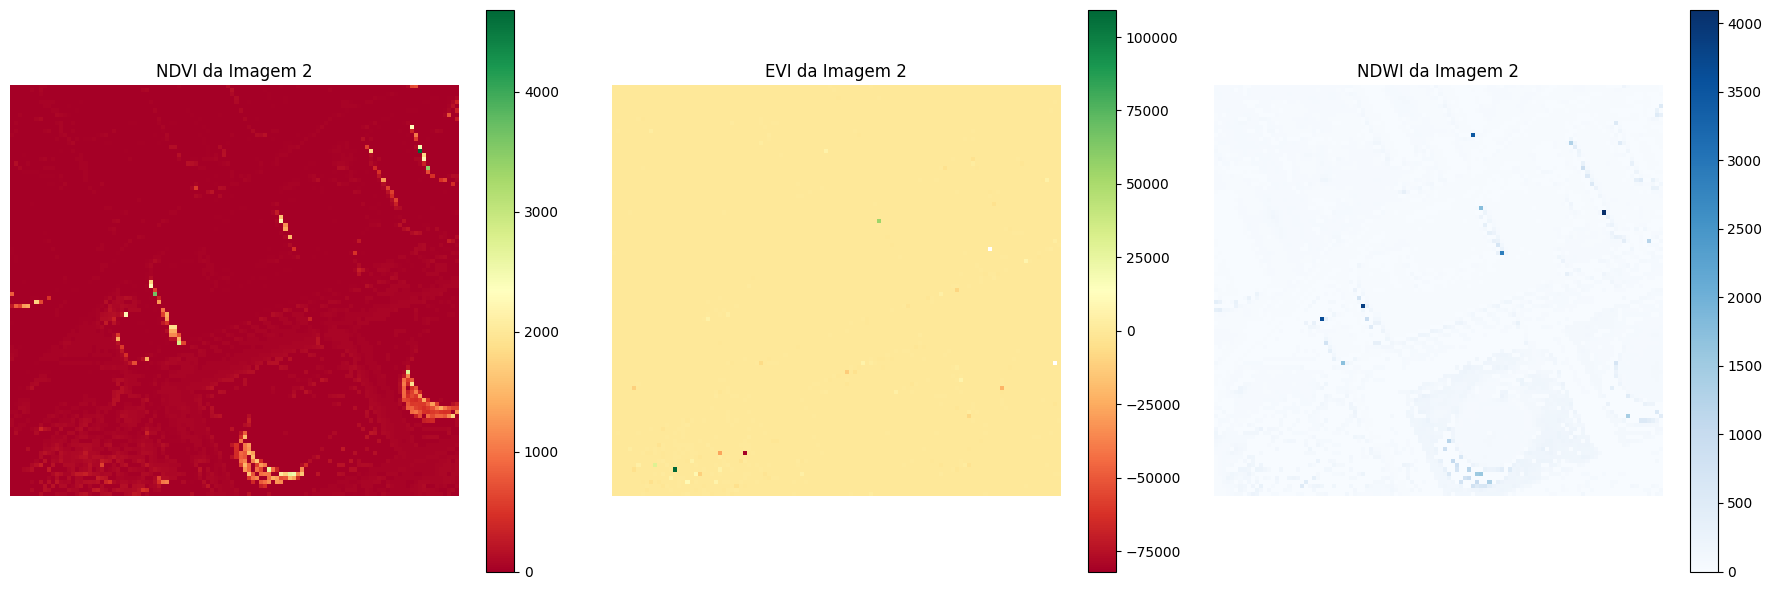

In [ ]:
# Crie uma figura com três subplots na mesma linha
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: NDVI
axs[0].imshow(ndvi_image2, cmap='RdYlGn')
axs[0].set_title('NDVI da Imagem 2')
axs[0].axis('off')
fig.colorbar(axs[0].imshow(ndvi_image2, cmap='RdYlGn'), ax=axs[0])

# Plot 2: EVI
axs[1].imshow(evi_image2, cmap='RdYlGn')
axs[1].set_title('EVI da Imagem 2')
axs[1].axis('off')
fig.colorbar(axs[1].imshow(evi_image2, cmap='RdYlGn'), ax=axs[1])

# Plot 3: NDWI
axs[2].imshow(ndwi_image2, cmap='Blues')
axs[2].set_title('NDWI da Imagem 2')
axs[2].axis('off')
fig.colorbar(axs[2].imshow(ndwi_image2, cmap='Blues'), ax=axs[2])

plt.tight_layout()
plt.show()


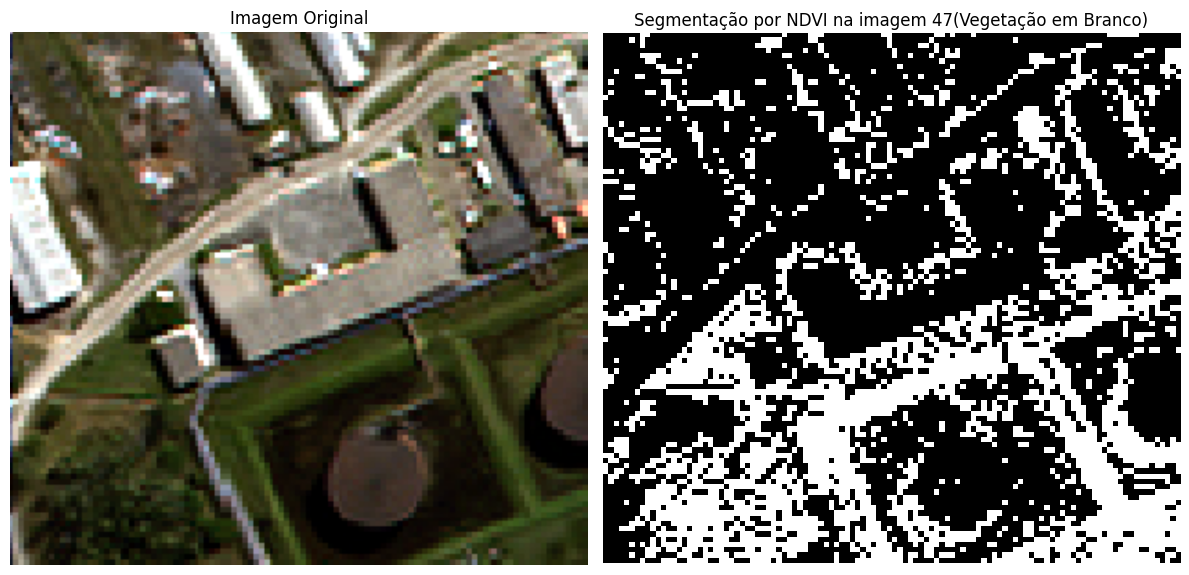

In [ ]:
# Suponha que você tenha um NDVI calculado (ndvi_imagem1) e um valor de limiar escolhido (por exemplo, 0.2)
limiar_ndvi = 0.2

# Aplicar o limiar NDVI
mascara_vegetacao = ndvi_image2 > limiar_ndvi

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Caminho para a imagem original no Google Drive
caminho_imagem_original = '/content/drive/MyDrive/FIESC_Prova/Questão2/img47.png'


# Carregue as imagens
imagem_original = mpimg.imread(caminho_imagem_original)

# Crie uma figura com dois subplots (um ao lado do outro)
plt.figure(figsize=(12, 6))

# Subplot 1: Imagem Original
plt.subplot(1, 2, 1)
plt.imshow(imagem_original)
plt.title('Imagem Original')
plt.axis('off')  # Desativa os eixos

# Subplot 2: Máscara de Segmentação por NDVI
plt.subplot(1, 2, 2)
plt.imshow(mascara_vegetacao, cmap='gray')
plt.title('Segmentação por NDVI na imagem 47(Vegetação em Branco)')
plt.axis('off')  # Desativa os eixos

plt.tight_layout()  # Melhora o espaçamento entre os subplots
plt.show()


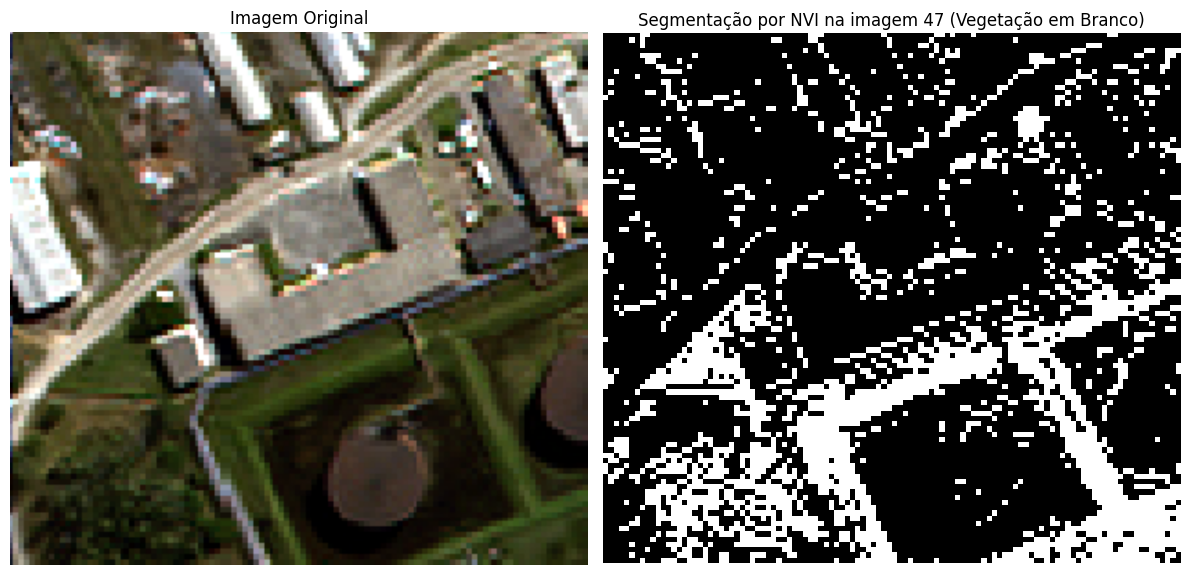

In [ ]:

limiar_nvi = 20

# Aplicar o limiar NVI
mascara_vegetacao = evi_image2 > limiar_nvi


# Caminho para a imagem original no Google Drive
caminho_imagem_original = '/content/drive/MyDrive/FIESC_Prova/Questão2/img47.png'


# Carregue as imagens
imagem_original = mpimg.imread(caminho_imagem_original)

# Crie uma figura com dois subplots (um ao lado do outro)
plt.figure(figsize=(12, 6))

# Subplot 1: Imagem Original
plt.subplot(1, 2, 1)
plt.imshow(imagem_original)
plt.title('Imagem Original')
plt.axis('off')  # Desativa os eixos

# Subplot 2: Máscara de Segmentação por NDVI
plt.subplot(1, 2, 2)
plt.imshow(mascara_vegetacao, cmap='gray')
plt.title('Segmentação por NVI na imagem 47 (Vegetação em Branco)')
plt.axis('off')  # Desativa os eixos

plt.tight_layout()  # Melhora o espaçamento entre os subplots
plt.show()


IMAGEM 3


In [ ]:
# Calcular o NDVI (Índice de Vegetação por Diferença Normalizada)
ndvi_image3 = (image3[:, :, 3] - image3[:, :, 2]) / (image3[:, :, 3] + image3[:, :, 2])

# Calcular o EVI (Índice de Vegetação Melhorado)
evi_image3 = 2.5 * ((image3[:, :, 3] - image3[:, :, 2]) / (image3[:, :, 3] + 6 * image3[:, :, 2] - 7.5 * image3[:, :, 0] + 1))

# Calcular o NDWI (Índice de Água por Diferença Normalizada)
ndwi_image3 = (image3[:, :, 2] - image3[:, :, 3]) / (image3[:, :, 2] + image3[:, :, 3])


<ipython-input-114-daf68c6e6759>:5: RuntimeWarning: divide by zero encountered in divide
  evi_image3 = 2.5 * ((image3[:, :, 3] - image3[:, :, 2]) / (image3[:, :, 3] + 6 * image3[:, :, 2] - 7.5 * image3[:, :, 0] + 1))


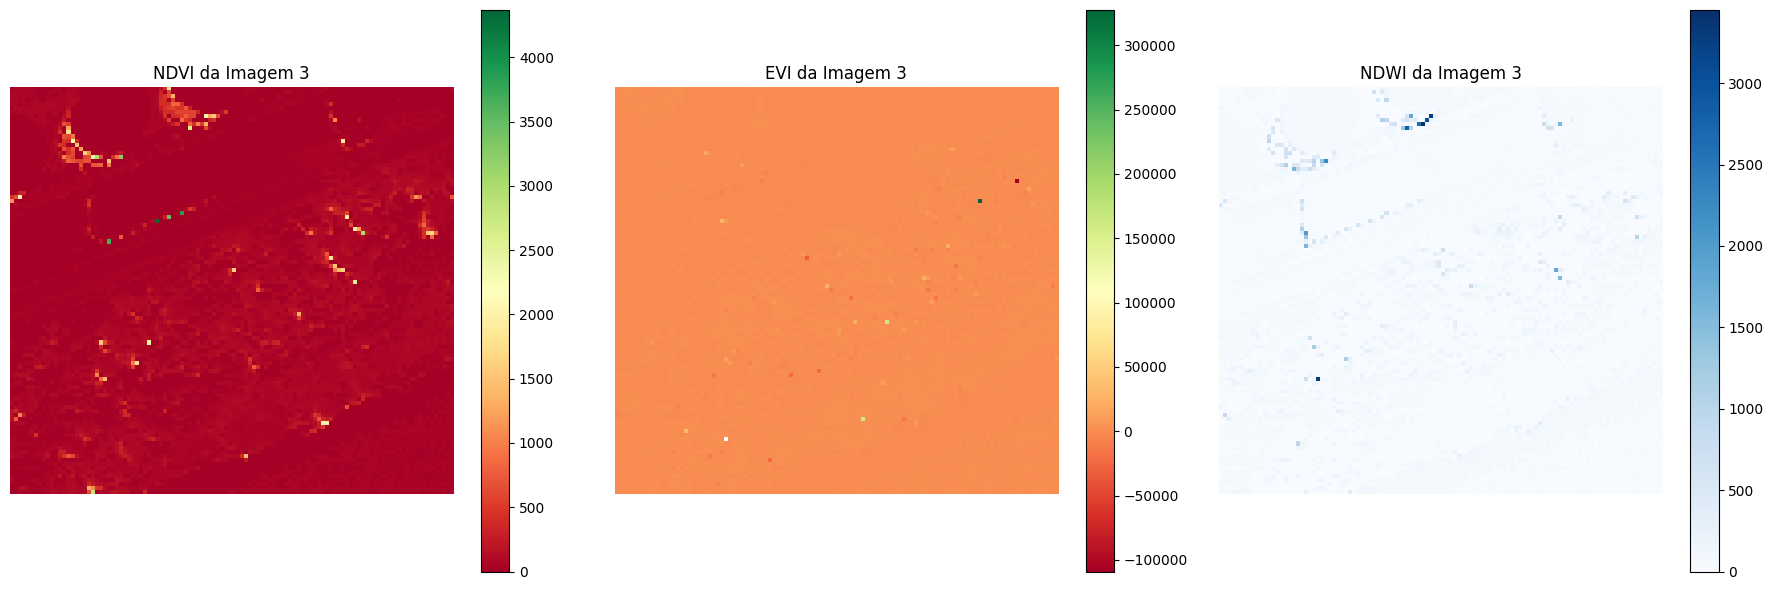

In [ ]:
# Crie uma figura com três subplots na mesma linha
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: NDVI
axs[0].imshow(ndvi_image3, cmap='RdYlGn')
axs[0].set_title('NDVI da Imagem 3')
axs[0].axis('off')
fig.colorbar(axs[0].imshow(ndvi_image3, cmap='RdYlGn'), ax=axs[0])

# Plot 2: EVI
axs[1].imshow(evi_image3, cmap='RdYlGn')
axs[1].set_title('EVI da Imagem 3')
axs[1].axis('off')
fig.colorbar(axs[1].imshow(evi_image3, cmap='RdYlGn'), ax=axs[1])

# Plot 3: NDWI
axs[2].imshow(ndwi_image3, cmap='Blues')
axs[2].set_title('NDWI da Imagem 3')
axs[2].axis('off')
fig.colorbar(axs[2].imshow(ndwi_image3, cmap='Blues'), ax=axs[2])

plt.tight_layout()
plt.show()


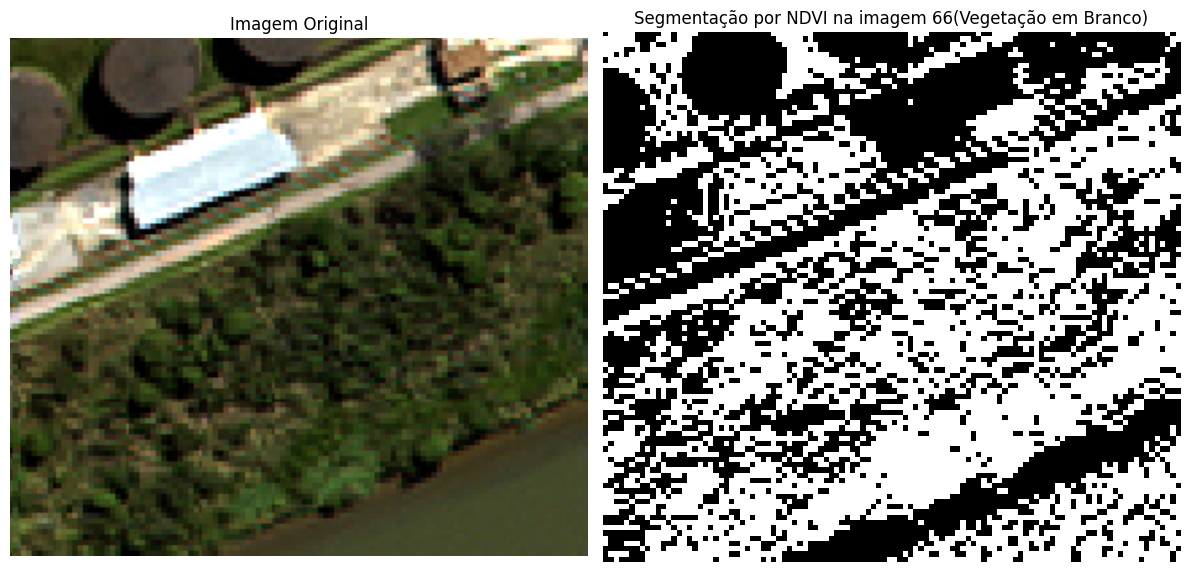

In [ ]:
# Suponha que você tenha um NDVI calculado (ndvi_imagem1) e um valor de limiar escolhido (por exemplo, 0.2)
limiar_ndvi = 0.4

# Aplicar o limiar NDVI
mascara_vegetacao = ndvi_image3 > limiar_ndvi

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Caminho para a imagem original no Google Drive
caminho_imagem_original = '/content/drive/MyDrive/FIESC_Prova/Questão2/img66.png'


# Carregue as imagens
imagem_original = mpimg.imread(caminho_imagem_original)

# Crie uma figura com dois subplots (um ao lado do outro)
plt.figure(figsize=(12, 6))

# Subplot 1: Imagem Original
plt.subplot(1, 2, 1)
plt.imshow(imagem_original)
plt.title('Imagem Original')
plt.axis('off')  # Desativa os eixos

# Subplot 2: Máscara de Segmentação por NDVI
plt.subplot(1, 2, 2)
plt.imshow(mascara_vegetacao, cmap='gray')
plt.title('Segmentação por NDVI na imagem 66(Vegetação em Branco)')
plt.axis('off')  # Desativa os eixos

plt.tight_layout()  # Melhora o espaçamento entre os subplots
plt.show()


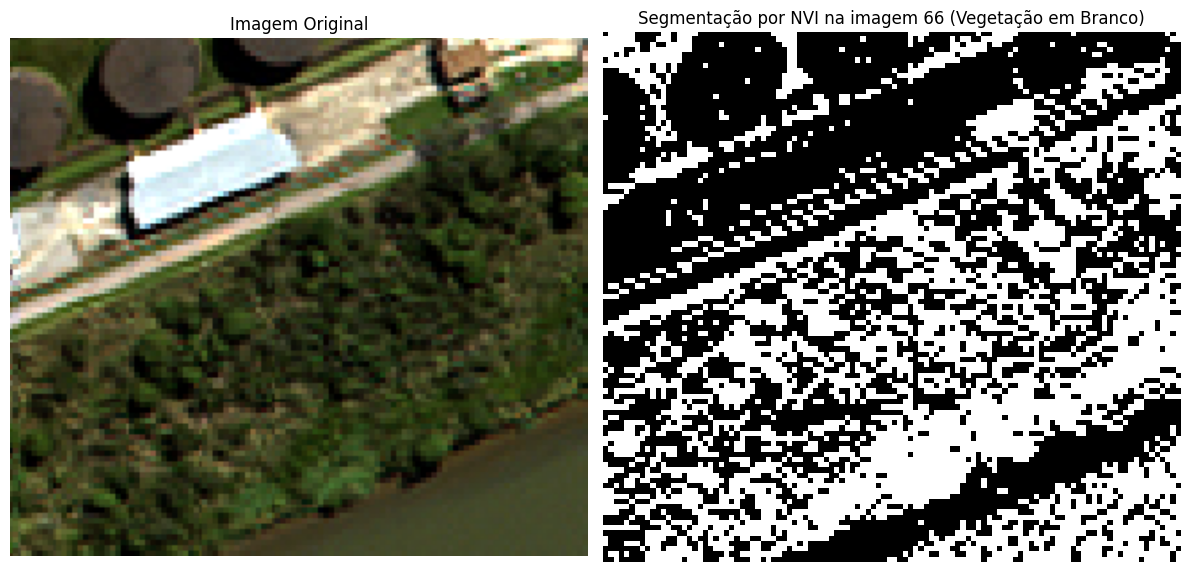

In [ ]:

limiar_nvi = 20

# Aplicar o limiar NVI
mascara_vegetacao = evi_image3 > limiar_nvi


# Caminho para a imagem original no Google Drive
caminho_imagem_original = '/content/drive/MyDrive/FIESC_Prova/Questão2/img66.png'


# Carregue as imagens
imagem_original = mpimg.imread(caminho_imagem_original)

# Crie uma figura com dois subplots (um ao lado do outro)
plt.figure(figsize=(12, 6))

# Subplot 1: Imagem Original
plt.subplot(1, 2, 1)
plt.imshow(imagem_original)
plt.title('Imagem Original')
plt.axis('off')  # Desativa os eixos

# Subplot 2: Máscara de Segmentação por NDVI
plt.subplot(1, 2, 2)
plt.imshow(mascara_vegetacao, cmap='gray')
plt.title('Segmentação por NVI na imagem 66 (Vegetação em Branco)')
plt.axis('off')  # Desativa os eixos

plt.tight_layout()  # Melhora o espaçamento entre os subplots
plt.show()


Imagem 4

In [ ]:
# Calcular o NDVI (Índice de Vegetação por Diferença Normalizada)
ndvi_image4 = (image4[:, :, 3] - image4[:, :, 2]) / (image4[:, :, 3] + image4[:, :, 2])

# Calcular o EVI (Índice de Vegetação Melhorado)
evi_image4 = 2.5 * ((image4[:, :, 3] - image4[:, :, 2]) / (image4[:, :, 3] + 6 * image4[:, :, 2] - 7.5 * image4[:, :, 0] + 1))

# Calcular o NDWI (Índice de Água por Diferença Normalizada)
ndwi_image4 = (image4[:, :, 2] - image4[:, :, 3]) / (image4[:, :, 2] + image4[:, :, 3])


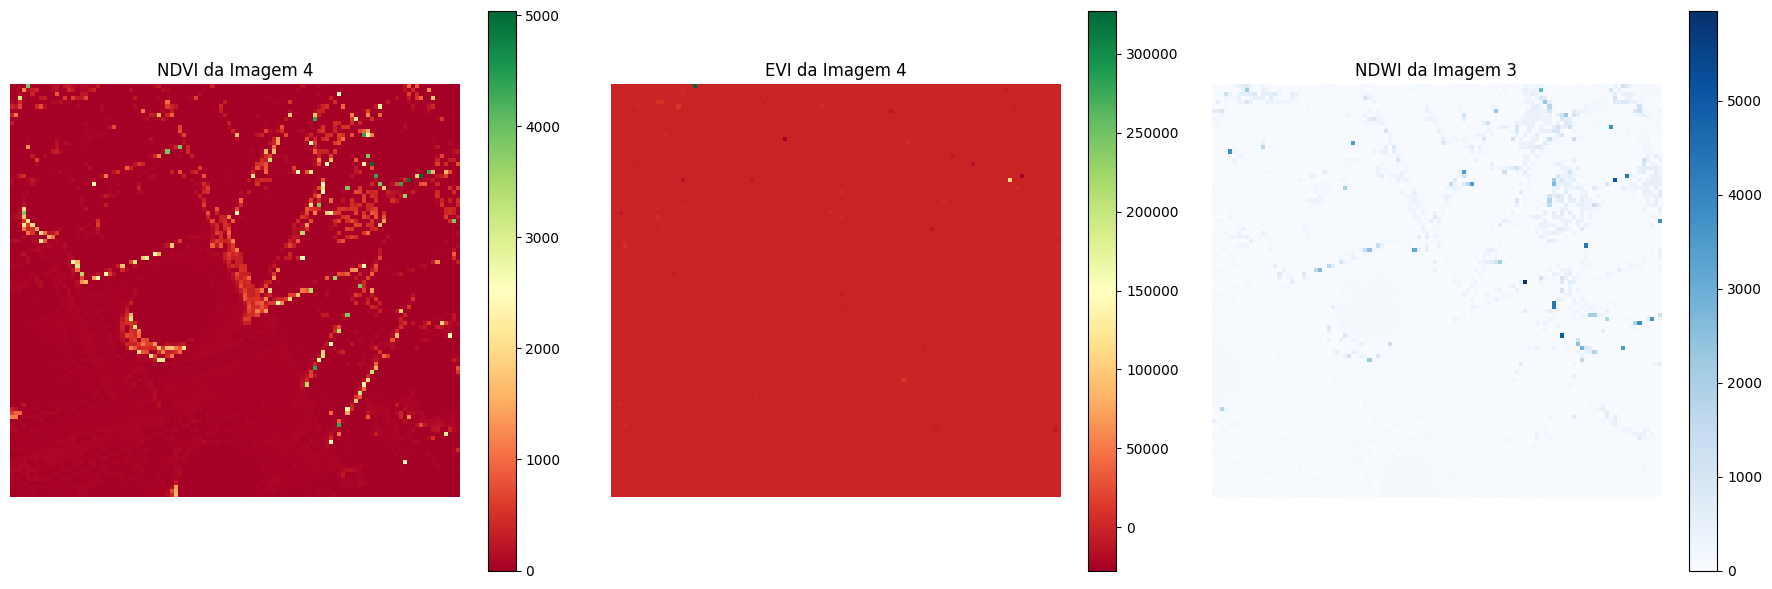

In [ ]:
# Crie uma figura com três subplots na mesma linha
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: NDVI
axs[0].imshow(ndvi_image4, cmap='RdYlGn')
axs[0].set_title('NDVI da Imagem 4')
axs[0].axis('off')
fig.colorbar(axs[0].imshow(ndvi_image4, cmap='RdYlGn'), ax=axs[0])

# Plot 2: EVI
axs[1].imshow(evi_image4, cmap='RdYlGn')
axs[1].set_title('EVI da Imagem 4')
axs[1].axis('off')
fig.colorbar(axs[1].imshow(evi_image4, cmap='RdYlGn'), ax=axs[1])

# Plot 3: NDWI
axs[2].imshow(ndwi_image4, cmap='Blues')
axs[2].set_title('NDWI da Imagem 3')
axs[2].axis('off')
fig.colorbar(axs[2].imshow(ndwi_image4, cmap='Blues'), ax=axs[2])

plt.tight_layout()
plt.show()


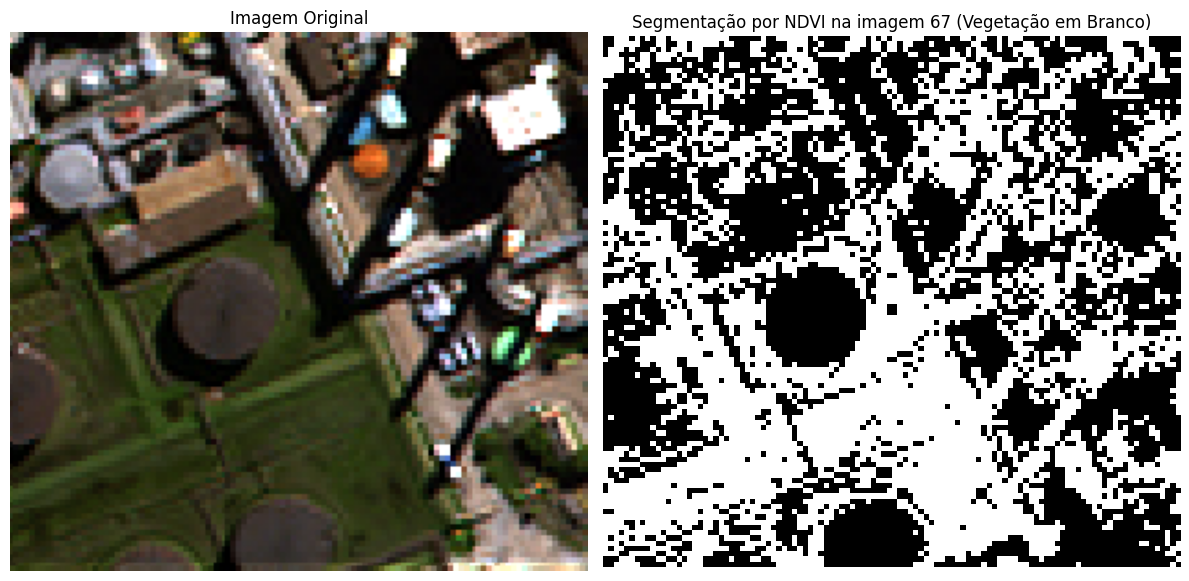

In [ ]:
# Suponha que você tenha um NDVI calculado (ndvi_imagem1) e um valor de limiar escolhido (por exemplo, 0.2)
limiar_ndvi = 0.2

# Aplicar o limiar NDVI
mascara_vegetacao = ndvi_image4 > limiar_ndvi

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Caminho para a imagem original no Google Drive
caminho_imagem_original = '/content/drive/MyDrive/FIESC_Prova/Questão2/img67.png'


# Carregue as imagens
imagem_original = mpimg.imread(caminho_imagem_original)

# Crie uma figura com dois subplots (um ao lado do outro)
plt.figure(figsize=(12, 6))

# Subplot 1: Imagem Original
plt.subplot(1, 2, 1)
plt.imshow(imagem_original)
plt.title('Imagem Original')
plt.axis('off')  # Desativa os eixos

# Subplot 2: Máscara de Segmentação por NDVI
plt.subplot(1, 2, 2)
plt.imshow(mascara_vegetacao, cmap='gray')
plt.title('Segmentação por NDVI na imagem 67 (Vegetação em Branco)')
plt.axis('off')  # Desativa os eixos

plt.tight_layout()  # Melhora o espaçamento entre os subplots
plt.show()


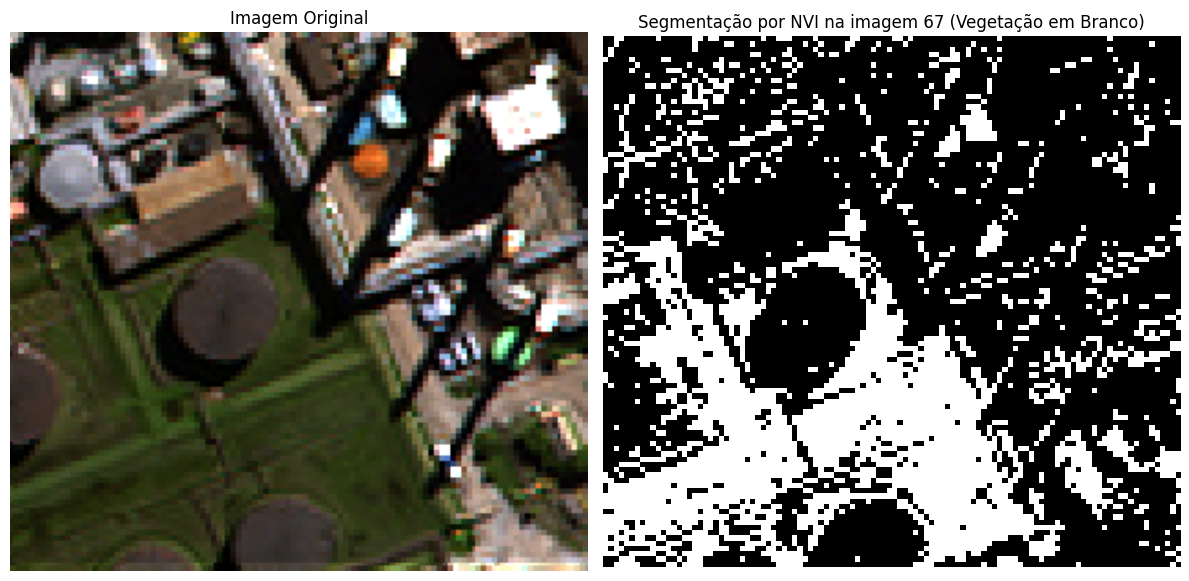

In [ ]:

limiar_nvi = 20

# Aplicar o limiar NVI
mascara_vegetacao = evi_image4 > limiar_nvi


# Caminho para a imagem original no Google Drive
caminho_imagem_original = '/content/drive/MyDrive/FIESC_Prova/Questão2/img67.png'


# Carregue as imagens
imagem_original = mpimg.imread(caminho_imagem_original)

# Crie uma figura com dois subplots (um ao lado do outro)
plt.figure(figsize=(12, 6))

# Subplot 1: Imagem Original
plt.subplot(1, 2, 1)
plt.imshow(imagem_original)
plt.title('Imagem Original')
plt.axis('off')  # Desativa os eixos

# Subplot 2: Máscara de Segmentação por NDVI
plt.subplot(1, 2, 2)
plt.imshow(mascara_vegetacao, cmap='gray')
plt.title('Segmentação por NVI na imagem 67 (Vegetação em Branco)')
plt.axis('off')  # Desativa os eixos

plt.tight_layout()  # Melhora o espaçamento entre os subplots
plt.show()
